In [4]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
PATH = 'C:/Users/ASIA_01/MaskOrNot'

In [8]:
train_dir = os.path.join(PATH, 'train')
valid_dir = os.path.join(PATH, 'validation')

In [12]:
train_mask_dir = os.path.join(train_dir,'0')
train_nomask_dir = os.path.join(train_dir,'1')
valid_mask_dir = os.path.join(valid_dir,'0')
valid_nomask_dir = os.path.join(valid_dir,'1')

In [18]:
num_mask_tr = len(os.listdir(train_mask_dir))
num_nomask_tr = len(os.listdir(train_nomask_dir))
num_mask_val = len(os.listdir(valid_mask_dir))
num_nomask_val = len(os.listdir(valid_nomask_dir))

total_train = num_mask_tr + num_nomask_tr
total_val = num_mask_val + num_nomask_val

In [16]:
print(num_nomask_tr)

24


In [14]:
print(num_mask_tr)

22


In [10]:
train_mask_dir

'C:/Users/ASIA_01/MaskOrNot\\train\\0'

In [23]:
#이렇게 프로그램 하는게 보기에도 좋고 깔끔
batch_size = 10
epochs = 10
IMG_HEIGHT=150
IMG_WIDTH=150

In [24]:
#keras에서 만든 클래스. ImageDataGenerator
#디스크로 불러오며, 사이즈 변경, 스케일링까지 한번에 할 수 있는 고급메소드가 들어있다.
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)

In [28]:
# class_mode ='binary' 이진분류, class_mode='categorical' 멀티분류
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory = train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode='binary')

Found 46 images belonging to 2 classes.


In [82]:
# class_mode ='binary' 이진분류, class_mode='categorical' 멀티분류
valid_data_gen = valid_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory = valid_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode='binary')

Found 54 images belonging to 2 classes.


In [83]:
sample_training_images, y_train = next(train_data_gen)

In [84]:
sample_training_images.shape

(10, 150, 150, 3)

In [85]:
y_train.shape

(10,)

In [86]:
y_train

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [87]:
#그림 5개씩 보여주는 함수
def plotImage(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

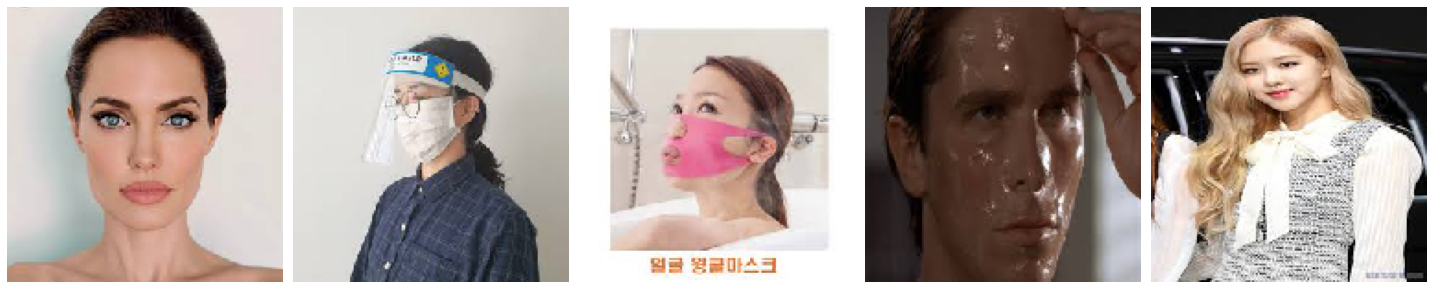

In [88]:
plotImage(sample_training_images[2:7])

In [89]:
 y_train[2:7]

array([1., 0., 0., 1., 1.], dtype=float32)

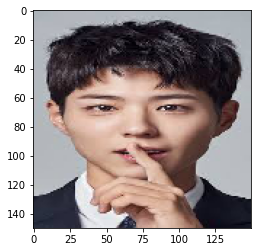

In [90]:
plt.imshow(sample_training_images[0])

In [91]:
model = Sequential([
    Conv2D(16,3,padding='same', activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPool2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [92]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [94]:
#학습시키는것이 살짝 다르다.
#파이썬에서 // 연산자는 나누기 후 몫만 취하고 나머지는 버림
# train과 validation을 동시실행

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/10
4/4 [==============================] - 1s 359ms/step - loss: 1.3985 - accuracy: 0.4167 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 1s 271ms/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 1s 255ms/step - loss: 0.6993 - accuracy: 0.4750 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 1s 254ms/step - loss: 0.6882 - accuracy: 0.3611 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 1s 248ms/step - loss: 0.6793 - accuracy: 0.5278 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 1s 253ms/step - loss: 0.6621 - accuracy: 0.4250 - val_loss: 0.6703 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 1s 247ms/step - loss: 0.6695 - accuracy: 0.5312 - val_loss: 0.6700 - val_accuracy: 0.5000
Epoch 8/10
4/4 [====

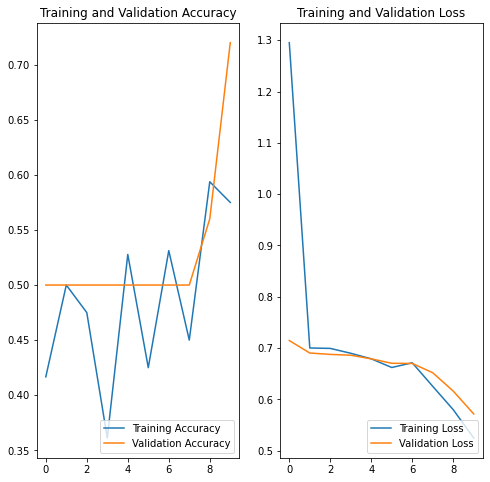

In [99]:
#학습 결과값으로 즉 history 그래프를 그려봅시다.
#그래프를 통해서 알 수 있는것을 어느정도의 accuracy 갖고 eposhs 수는 얼마나 좋은지 확인용

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()


In [101]:
#모델 저장하기
model.save('classifying_mask_or_nomask.h5') #적어도 Validaion score가 0.85 넘으면 저장

In [113]:
#batch_size=20 validation 데이터 가져오기. 소수라서 모두 가져온다.
#만일 데이터가 큰 경우에도 가져오고 싶은만틈 가져오면된다.

val_data_gen = valid_image_generator.flow_from_directory(batch_size=20,
                                                              directory=valid_dir,
                                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                              class_mode='binary')

Found 54 images belonging to 2 classes.


In [114]:
test_images, test_labels = next(val_data_gen)

In [115]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

20/1 - 0s - loss: 0.5834 - accuracy: 0.7500


In [116]:
model.predict_proba(test_images[[3]])

array([[-0.0744928]], dtype=float32)

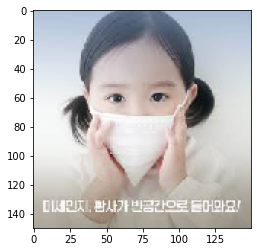

In [117]:
plt.imshow(test_images[3])

In [118]:
#정확도 올려보고Overfitting  해결
#단 데이터 무조건 많아야 함
#현재보다 Overfitting  많이 개선된다

image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True) #세로축 기준 반전

In [121]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                directory = valid_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode='binary')

Found 54 images belonging to 2 classes.


In [124]:
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

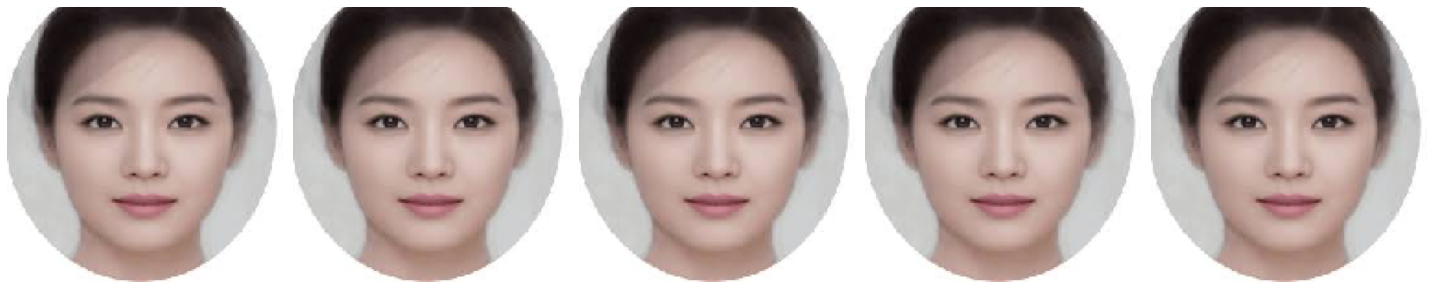

In [127]:
plotImage(augmented_images)

In [130]:
#정해진 각도 사이로 랜덤하게 돌리기
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                directory = valid_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

Found 54 images belonging to 2 classes.


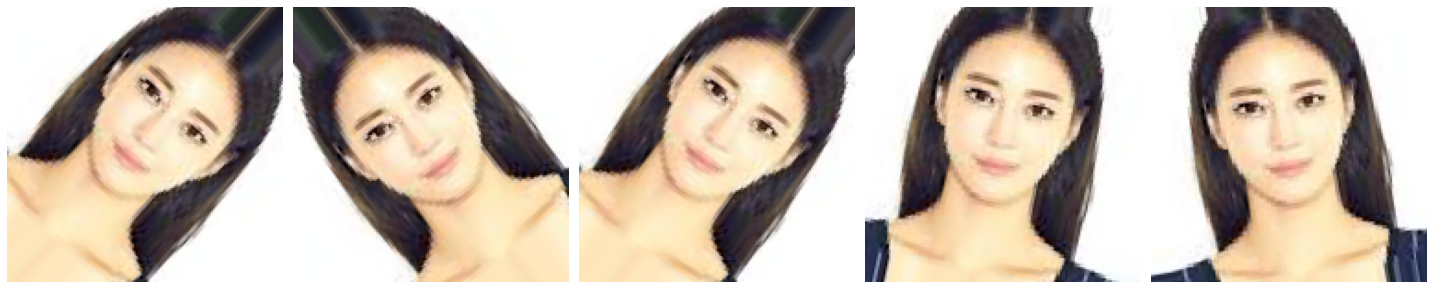

In [131]:
plotImage(augmented_images)

In [132]:
#스케일링 다시하기
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                directory = valid_dir,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                          class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

Found 54 images belonging to 2 classes.


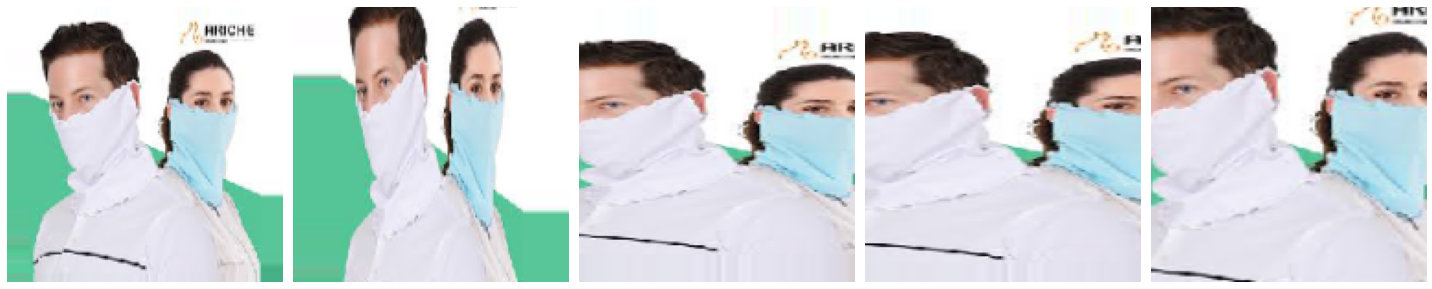

In [133]:
plotImage(augmented_images)

In [134]:
image_gen = ImageDataGenerator(rescale=1./255)


In [142]:
model_new = Sequential([
    Conv2D(16,3,padding='same', activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPool2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [143]:
model_new.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [145]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/10
4/4 [==============================] - 1s 313ms/step - loss: 0.7542 - accuracy: 0.5882 - val_loss: 0.6740 - val_accuracy: 0.5426
Epoch 2/10
4/4 [==============================] - 1s 300ms/step - loss: 0.7111 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 1s 293ms/step - loss: 0.6865 - accuracy: 0.4706 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 1s 270ms/step - loss: 0.6903 - accuracy: 0.5588 - val_loss: 0.6580 - val_accuracy: 0.5532
Epoch 5/10
4/4 [==============================] - 1s 281ms/step - loss: 0.6689 - accuracy: 0.4412 - val_loss: 0.6372 - val_accuracy: 0.5213
Epoch 6/10
4/4 [==============================] - 1s 312ms/step - loss: 0.6230 - accuracy: 0.6000 - val_loss: 0.5374 - val_accuracy: 0.6915
Epoch 7/10
4/4 [==============================] - 1s 268ms/step - loss: 0.5755 - accuracy: 0.7353 - val_loss: 0.4889 - val_accuracy: 0.6915
Epoch 8/10
4/4 [====

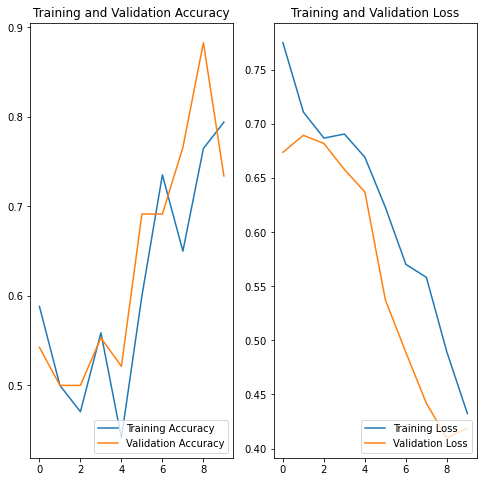

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()
